In [ ]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [2]:
#LOADING DATASET
df = pd.read_csv("D:\\CODSOFT\\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#Dataset Description
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#Difference between the datapoints in a legit and fraudulent transaction
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [6]:
#Difference between the no. of legit and fradulent transaction
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

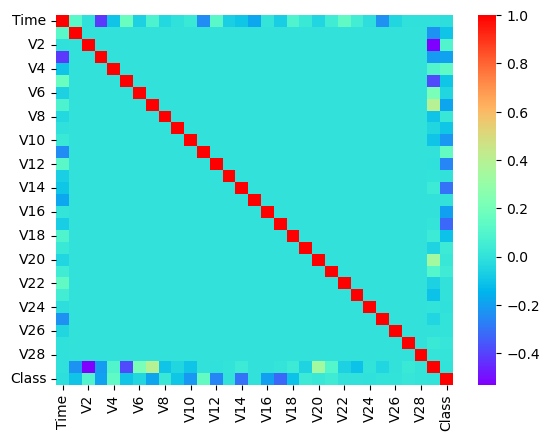

In [7]:
#Correlation Matrix
corr = df.corr()
sns.heatmap(corr, cmap= 'rainbow')

In [8]:
y = df.Class
x = df.drop('Class', axis = 1)

In [9]:
x.shape

(284807, 30)

In [10]:
y.shape

(284807,)

In [11]:
#splitting into xtrain ytrain xtest ytest
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=30)

In [12]:
#Testing the data with Logistic Regression
lr_model = LogisticRegression(solver = 'liblinear').fit(x_train,y_train)

In [13]:
lr_pred = lr_model.predict(x_test)
print(accuracy_score(y_test,lr_pred))

0.9991573270413753


In [14]:
#checking f1 score and recall
print(f1_score(y_test, lr_pred))
print(recall_score(y_test, lr_pred))

0.7599999999999999
0.6737588652482269


In [15]:
#Testing the data with Random Forest
rf_model = RandomForestClassifier(n_estimators = 10).fit(x_train,y_train)

In [16]:
rf_pred = rf_model.predict(x_test)
print(accuracy_score(y_test, rf_pred))

0.9994803516755147


In [17]:
print(f1_score(y_test, rf_pred))
print(recall_score(y_test, rf_pred))

0.852589641434263
0.7588652482269503


The data is highly imbalanced.
0-->Legit transaction-->284315
1-->Fraud transaction-->492

And hence the accuracy is not the perfect way to evaluate the model

And thus the f1-score and recall of logistic regressor is low

Random Forest is better in this matter but still it is not accurate

To solve the issue of imbalance we will try oversampling or undersampling the data

In [18]:
from sklearn.utils import resample

In [19]:
#concatinating x data to oversample the minority
X = pd.concat([x_train,y_train], axis=1) 
fraud = X[X.Class == 1]
legit = X[X.Class == 0]

fraud_upsample = resample(fraud, 
                         replace= True,
                         n_samples=len(legit),
                         random_state = 30)

upsampled_data = pd.concat([legit, fraud_upsample])
upsampled_data.Class.value_counts()

0    213254
1    213254
Name: Class, dtype: int64

In [20]:
#Testing again with Logistic and Random Forest Regression
y1_train = upsampled_data.Class
x1_train = upsampled_data.drop('Class', axis = 1)

new_lr_model = LogisticRegression(solver='liblinear').fit(x1_train,y1_train)
new_lr_pred = new_lr_model.predict(x_test)

new_rf_model = RandomForestClassifier().fit(x1_train,y1_train)
new_rf_pred = new_rf_model.predict(x_test)

In [21]:
print(accuracy_score(y_test,new_lr_pred))
print(accuracy_score(y_test,new_rf_pred))

0.9755905732985029
0.9994382180275835


In [22]:
#checking f1-score and recall_score
print(f1_score(y_test, new_lr_pred))
print(recall_score(y_test, new_lr_pred))
print(f1_score(y_test, new_rf_pred))
print(recall_score(y_test, new_rf_pred))

0.12663316582914572
0.8936170212765957
0.84251968503937
0.7588652482269503


In [23]:
# Trying the undersampling method

legit_downsample = resample(legit,
                            replace= True,
                            n_samples=len(fraud),
                            random_state = 30)

downsampled_data = pd.concat([legit_downsample, fraud])
downsampled_data.Class.value_counts()

0    351
1    351
Name: Class, dtype: int64

In [24]:
y1_train = downsampled_data.Class
x1_train = downsampled_data.drop('Class', axis = 1)

new_lr_model = LogisticRegression(solver='liblinear').fit(x1_train,y1_train)
new_lr_pred = new_lr_model.predict(x_test)

new_rf_model = RandomForestClassifier().fit(x1_train,y1_train)
new_rf_pred = new_rf_model.predict(x_test)

In [25]:
print(accuracy_score(y_test,new_lr_pred))
print(accuracy_score(y_test,new_rf_pred))

0.9694250161512317
0.9698323080812337


In [26]:
#checking f1-score and recall_score
print(f1_score(y_test, new_lr_pred))
print(recall_score(y_test, new_lr_pred))
print(f1_score(y_test, new_rf_pred))
print(recall_score(y_test, new_rf_pred))

0.10374639769452448
0.8936170212765957
0.10723192019950126
0.9148936170212766


# Conclusion:

## Logistic Regression<br>
### before sampling<br>
Accuracy:0.9991573270413753<br>
f1 score:0.7599999999999999<br>
recall:0.6737588652482269<br>
Accuracy was good but after retrieving the f1-score and recall, we learned that this is not the optimal way.

### over sampling<br>
Accuracy:0.9755905732985029<br>
f1 score:0.12663316582914572<br>
recall:0.8936170212765957<br>
Recall has improved here, but f1-score has reduced drastically.

### under sampling<br>
Accuracy:0.9694250161512317<br>
f1 score:0.10374639769452448<Br>
recall:0.8936170212765957<br>
Undersampling also cannot improve the matrics.

## Random Forest Classifer<br>
### before sampling<br>
Accuracy:0.9994803516755147<br>
f1 score:0.852589641434263<br>
recall:0.7588652482269503<br>
Random Forest is comparativily better in terms of the values.

### over sampling<br>
Accuracy:0.9994382180275835<br>
f1 score:0.84251968503937<br>
recall:0.7588652482269503<br>
The result of oversampling did not brought major improvement in the values.

### under sampling<br>
Accuracy:0.9698323080812337<br>
f1 score:0.10723192019950126<Br>
recall:0.9148936170212766<br>
Under sampling deteriorated the model performance.

Thus this dataset works best with the random forest classifier